In [ ]:
import pandas as pd
df = pd.read_csv("hotel.csv")

df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:

#Sadalīšana pēc X un y. mērķa kolonnas noteikšana
target_col = "booking_status"

X = df.drop(columns=[target_col])
y = df[target_col]

num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(exclude=["number"]).columns

print("Numeriskās kolonnas:", list(num_cols))
print("Kategoriskās kolonnas:", list(cat_cols))


Numeriskās kolonnas: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Kategoriskās kolonnas: ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [3]:
categorical_cols = df.select_dtypes(exclude='number')

for col in categorical_cols:
    print(f"\nKolonna: {col}")
    print(df[col].value_counts(dropna=False))


Kolonna: Booking_ID
Booking_ID
INN00001    1
INN00002    1
INN00003    1
INN00004    1
INN00005    1
           ..
INN36271    1
INN36272    1
INN36273    1
INN36274    1
INN36275    1
Name: count, Length: 36275, dtype: int64

Kolonna: type_of_meal_plan
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

Kolonna: room_type_reserved
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

Kolonna: market_segment_type
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Kolonna: booking_status
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [4]:
from scipy.stats import f_oneway

anova_results = {}
numeric_cols = df.select_dtypes(include='number')
for col in numeric_cols.columns:
    groups = [group[col].values for name, group in df.groupby("booking_status")]
    F, p = f_oneway(*groups)
    anova_results[col] = {"F-stat": F, "p-value": p}

pd.DataFrame(anova_results).T.sort_values("p-value")


,F-stat,p-value
lead_time,8636.863036,0.000000e+00
no_of_special_requests,2482.040462,0.000000e+00
arrival_year,1208.037212,2.085779e-260
avg_price_per_room,752.582603,5.230319e-164
repeated_guest,422.379313,2.523315e-93
no_of_week_nights,316.434859,1.727216e-70
no_of_adults,276.133767,8.848338e-62
required_car_parking_space,271.448581,9.125922e-61
no_of_weekend_nights,137.995720,8.340702e-32
no_of_previous_bookings_not_canceled,131.842414,1.828736e-30


booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


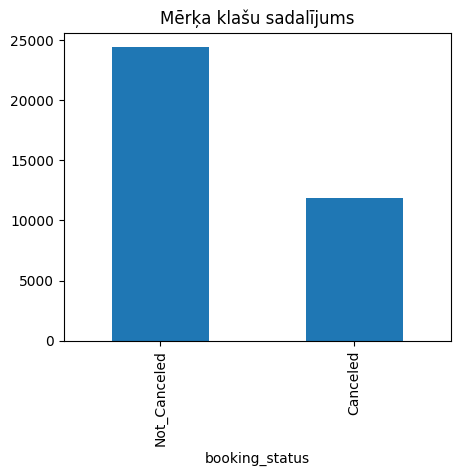

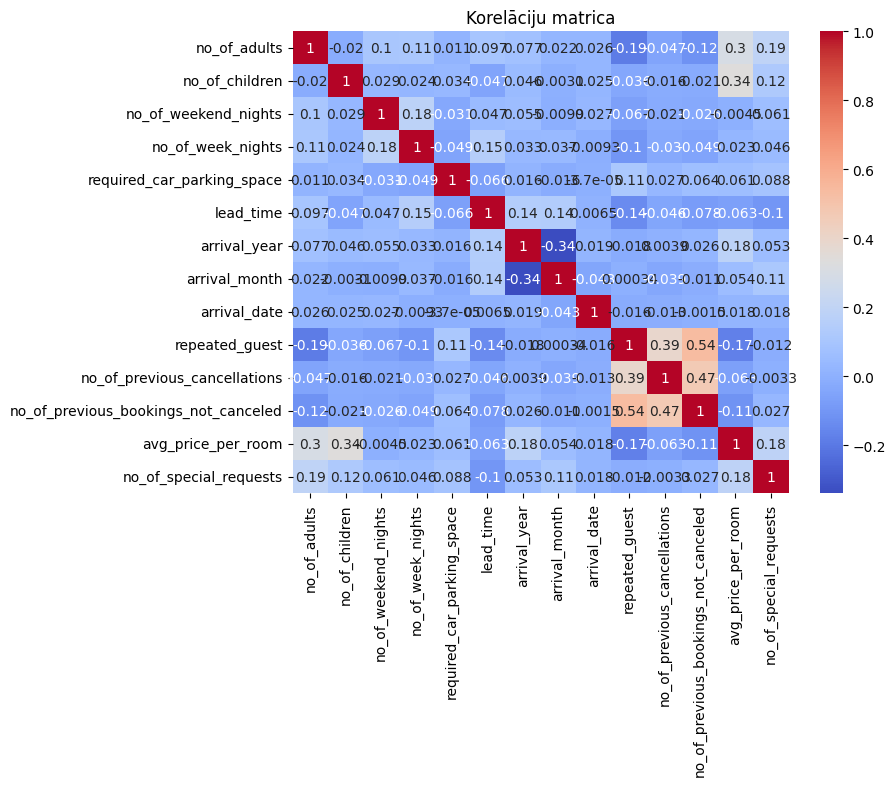

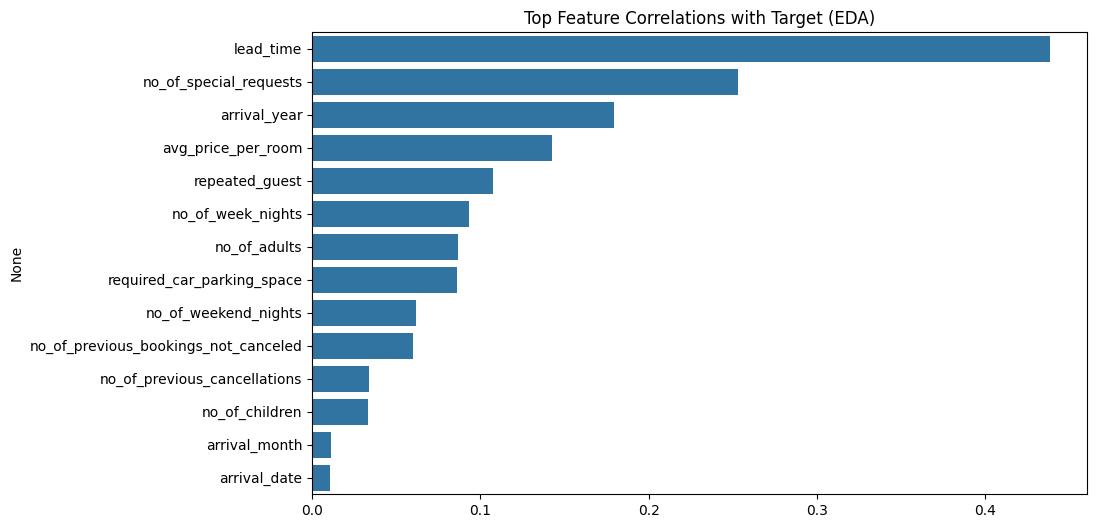

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
df[target_col].value_counts().plot(kind="bar")
print(df[target_col].value_counts())
print(df[target_col].value_counts())
plt.title("Mērķa klašu sadalījums")
plt.show()

if len(num_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Korelāciju matrica")
    plt.show()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.copy()
df_encoded[target_col] = le.fit_transform(df_encoded[target_col])

correlations = df_encoded[list(num_cols) + [target_col]].corr()[target_col].drop(target_col).abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Top Feature Correlations with Target (EDA)")
plt.show()

# Apmacība

In [5]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])


In [6]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

models = {
    "Dummy": {"model": DummyClassifier(strategy="most_frequent"), "params": {}},
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, class_weight="balanced"),
        "params": {"model__C": [0.1,1,3], "model__penalty": ["l2"]}
    },
    "RandomForest": {
        "model": RandomForestClassifier(class_weight="balanced", random_state=42),
        "params": {"model__n_estimators": [200,400], "model__max_depth": [None,10,20]}
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {"model__n_estimators": [100,200], "model__learning_rate": [0.05,0.1]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"model__n_neighbors":[3,5,7]}
    }
}

results = []
best_model = None
best_score = -1

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

classes = list(y.unique())
pos_label = classes[0]

results = []
best_model = None
best_score = -1

for name, cfg in models.items():
    print(f"Modelis: {name}")
    pipe = Pipeline([("prep", preprocessor), ("model", cfg["model"])])

    # GridSearch
    if cfg["params"]:
        grid = GridSearchCV(pipe, cfg["params"], scoring="roc_auc", cv=5, n_jobs=-1)
        grid.fit(X_train, y_train)
        best_est = grid.best_estimator_
        best_cv = grid.best_score_
    else:
        pipe.fit(X_train, y_train)
        best_est = pipe
        if hasattr(best_est, "predict_proba"):
            best_cv = roc_auc_score(y_train, best_est.predict_proba(X_train)[:, 1])
        else:
            best_cv = 0

    preds = best_est.predict(X_test)

    if hasattr(best_est, "predict_proba"):
        prob = best_est.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, prob)
    else:
        prob = None
        auc = None

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, pos_label=pos_label)

    results.append({
        "model": name,
        "cv_auc": best_cv,
        "test_auc": auc,
        "acc": acc,
        "f1": f1
    })

    if best_cv > best_score:
        best_score = best_cv
        best_model = best_est
        best_model_name = name

results_df = pd.DataFrame(results)
results_df


Modelis: Dummy
Modelis: LogisticRegression
Modelis: RandomForest
Modelis: GradientBoosting
Modelis: KNN


,model,cv_auc,test_auc,acc,f1
0,Dummy,0.500000,0.500000,0.672333,0.804066
1,LogisticRegression,0.861390,0.867697,0.784526,0.832008
2,RandomForest,0.940461,0.947395,0.894055,0.923506
3,GradientBoosting,0.912485,0.920855,0.858403,0.898089
4,KNN,0.898529,0.908832,0.852339,0.891733


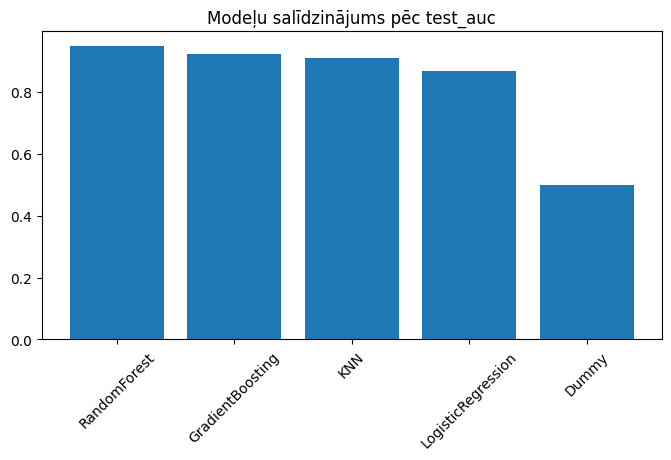

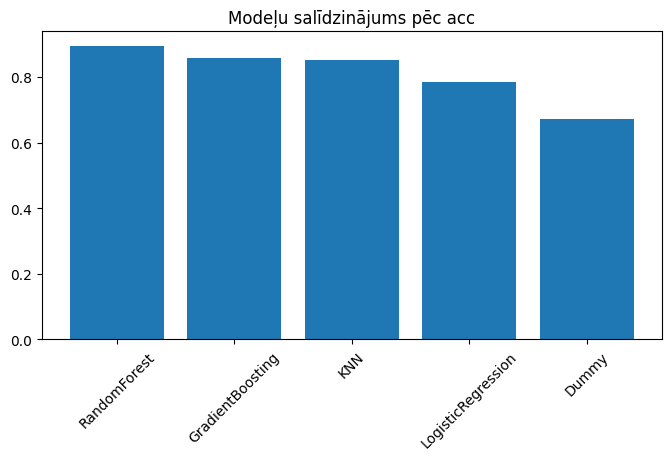

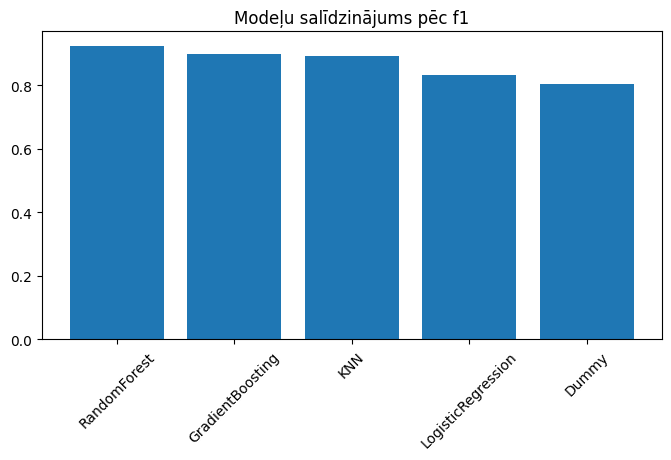

In [7]:

import matplotlib.pyplot as plt

plot_df = results_df.sort_values(by="test_auc", ascending=False)

for metric in ["test_auc", "acc", "f1"]:
    plt.figure(figsize=(8,4))
    plt.bar(plot_df["model"], plot_df[metric])
    plt.title(f"Modeļu salīdzinājums pēc {metric}")
    plt.xticks(rotation=45)
    plt.show()


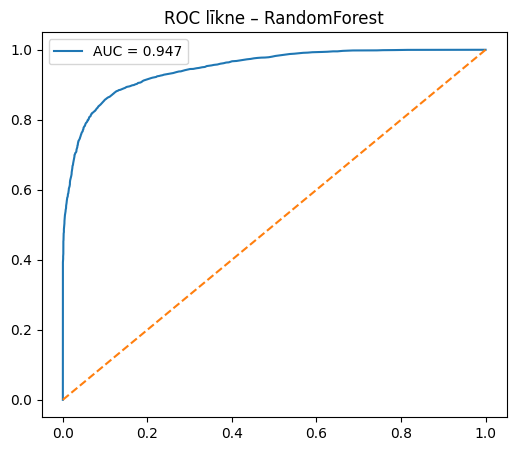

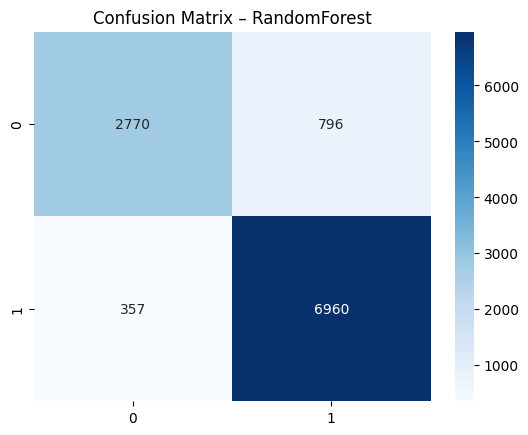

In [8]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

positive_class = 'Canceled'
class_index = list(best_model.classes_).index(positive_class)
y_prob = best_model.predict_proba(X_test)[:, class_index]

fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=positive_class)
roc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc:.3f}")
plt.plot([0,1],[0,1],"--")
plt.title(f"ROC līkne – {best_model_name}")
plt.legend()
plt.show()

cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix – {best_model_name}")
plt.show()